In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

from time_series_extractor import *
from SubjectMagicFeatures import *
from featureExtractor import *
from plots import *
card_names = ['unicorn', 'minion', 'pig', 'aliens']

In [11]:
mode = "sub"
print("================ MODE : {} ================".format(mode))
features = extractAndSaveAll(out_file="features/all_{}.csv".format(mode),
                             ref_to_base=True, mode="div", short_resp=500)
#features = pd.read_csv("features/all_{}.csv".format(mode), sep='\t')

================ MODE : sub ================
LOAD s4 from frontiers
LOAD s5 from frontiers
LOAD s6 from frontiers
LOAD s7 from frontiers
LOAD s8 from frontiers
LOAD s10 from frontiers
LOAD s11 from frontiers
LOAD s12 from frontiers
LOAD s13 from frontiers
LOAD s14 from frontiers
LOAD s15 from frontiers
LOAD s16 from frontiers
LOAD s18 from frontiers
LOAD s20 from frontiers
LOAD s21 from frontiers
LOAD s22 from frontiers
LOAD s25 from frontiers


In [12]:
#features = features.loc[(features['show_order'] != 1) & (features['show_order'] != 6)]

In [13]:
plot_column_names = [
        'subject',
        #'source',
        'duration',
        'card_class',
        #'show_order',
        'fix_freq','sacc_freq',
        'pd_right_mean','pd_right_std','pd_right_min','pd_right_max',
        'pd_left_mean','pd_left_std','pd_left_min','pd_left_max',
        'sre_fix_freq','sre_sacc_freq',
        'sre_pd_right_mean','sre_pd_right_std',
        'sre_pd_right_min','sre_pd_right_max',
        'sre_pd_left_mean','sre_pd_left_std',
        'sre_pd_left_min','sre_pd_left_max',
        'srl_fix_freq','srl_sacc_freq',
        'srl_pd_right_mean','srl_pd_right_std',
        'srl_pd_right_min','srl_pd_right_max',
        'srl_pd_left_mean','srl_pd_left_std',
        'srl_pd_left_min','srl_pd_left_max',
        'label'
    ]

feat_cols = [
        'duration',
        'fix_freq',
        'sacc_freq',
        'pd_right_mean',
        'pd_right_std',
        'pd_right_min',
        'pd_right_max',
        'pd_left_mean',
        'pd_left_std',
        'pd_left_min',
        'pd_left_max',
        'sre_fix_freq',
        'sre_sacc_freq',
        'sre_pd_right_mean',
        'sre_pd_right_std',
        'sre_pd_right_min',
        'sre_pd_right_max',
        'sre_pd_left_mean',
        'sre_pd_left_std',
        'sre_pd_left_min',
        'sre_pd_left_max',
        'srl_fix_freq',
        'srl_sacc_freq',
        'srl_pd_right_mean',
        'srl_pd_right_std',
        'srl_pd_right_min',
        'srl_pd_right_max',
        'srl_pd_left_mean',
        'srl_pd_left_std',
        'srl_pd_left_min',
        'srl_pd_left_max',
        'label'
    ]


def bigAggregation(features, sub, cols, aggrZeros, aggrOnes):
    data = features[cols].loc[features['subject'] == sub]
    zeros = data.loc[features['label'] == 0].drop(['card_class'], axis=1)
    ones = data.loc[features['label'] == 1]

    for col in zeros.columns:
        zeros[col] = zeros[col].mean()
    zeros = zeros.head(1)
    zeros['card_class'] = "avg"
    
    aggrZeros = aggrZeros.append(zeros, ignore_index=True)
    aggrOnes = aggrOnes.append(ones, ignore_index=True)
    
    return aggrZeros, aggrOnes

In [14]:
aggrZeros = pd.DataFrame(columns=plot_column_names)
aggrOnes = pd.DataFrame(columns=plot_column_names)

markers=[',','1','v','^','<','>','8','s','p','P','*','h','H','+','x','X','D','d','|','_','o','2','3','4','.']
subjects = features.groupby('subject').count().index.values

for sub in subjects:
    aggrZeros, aggrOnes = bigAggregation(features, sub, plot_column_names, aggrZeros, aggrOnes)

In [15]:
sub_z = aggrZeros['subject'].values
sub_o = aggrOnes['subject'].values

subjects = [int(s) for s in sub_z if s in sub_o]
subjects

[4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 25]

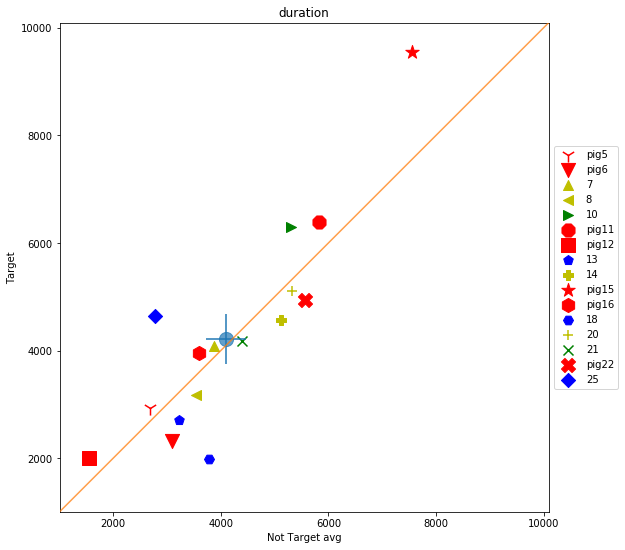

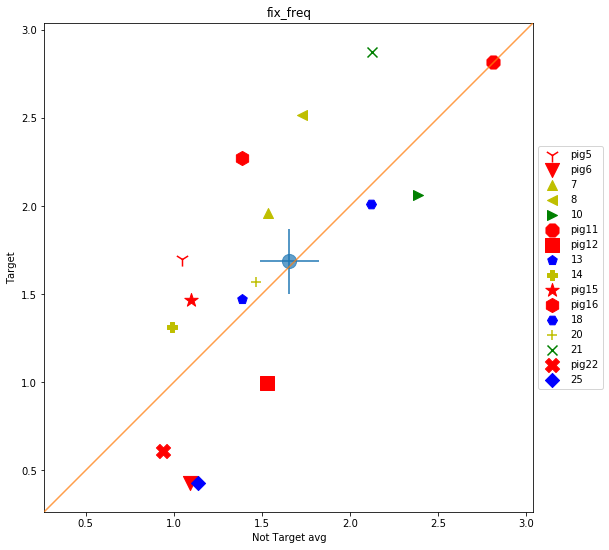

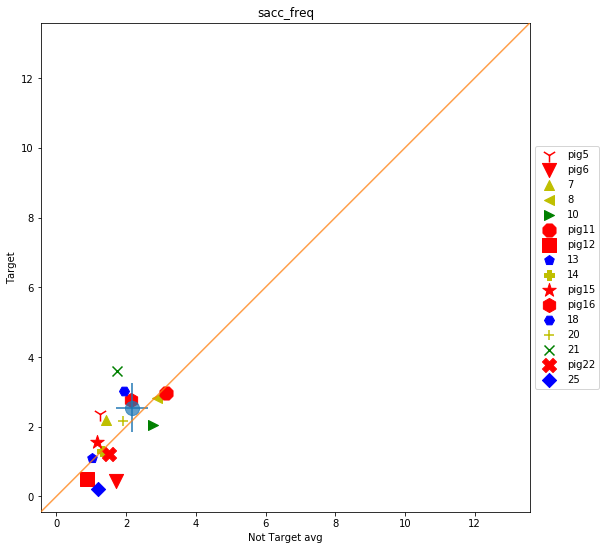

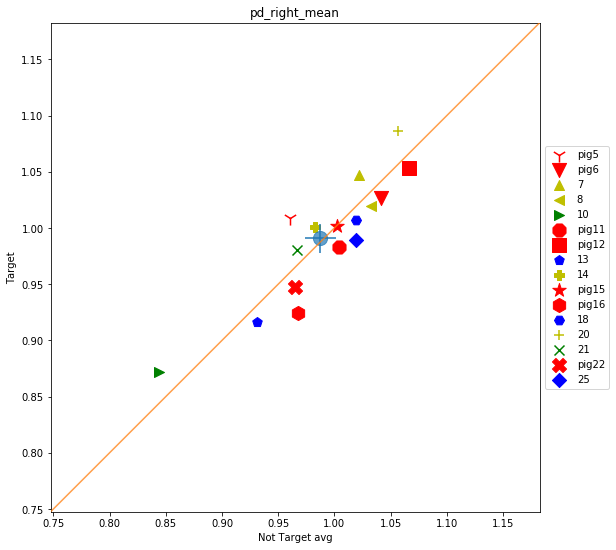

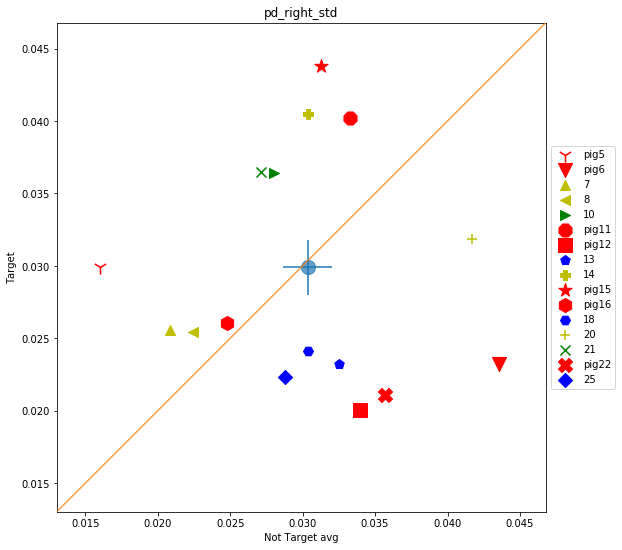

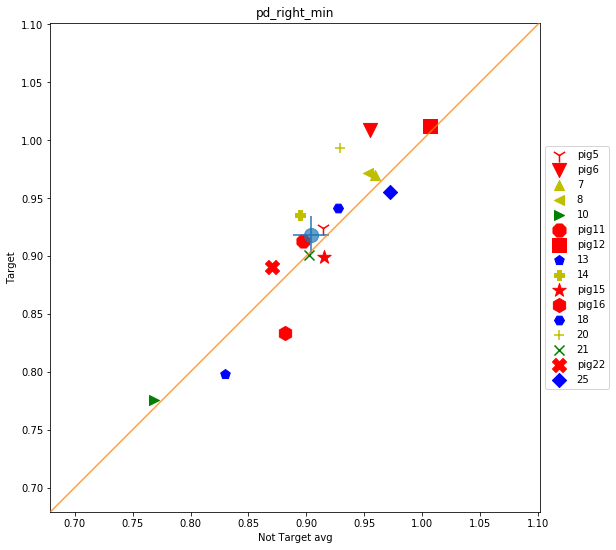

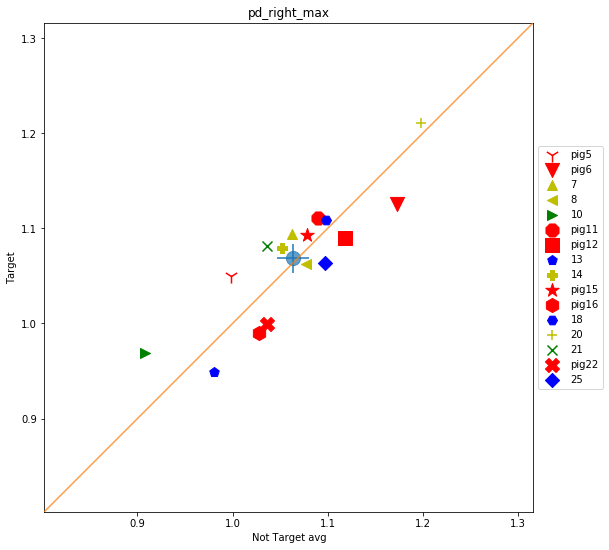

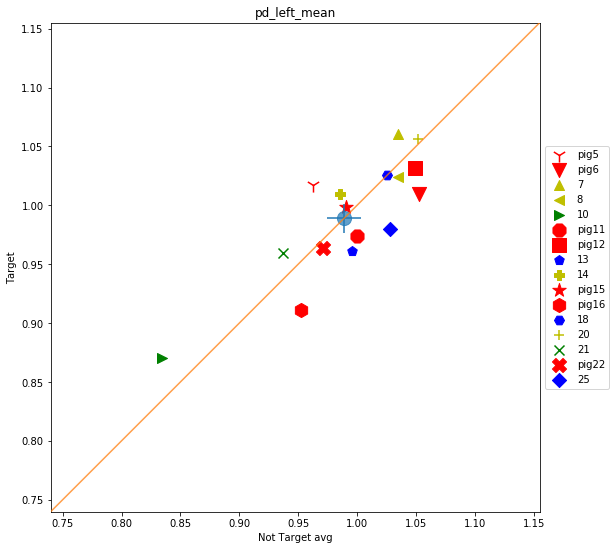

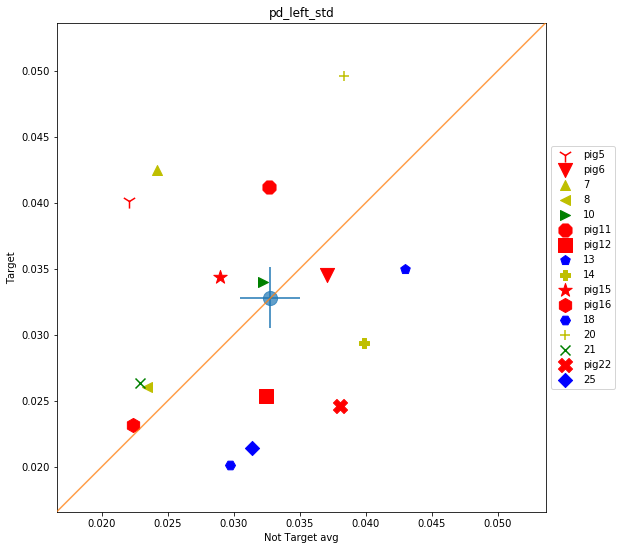

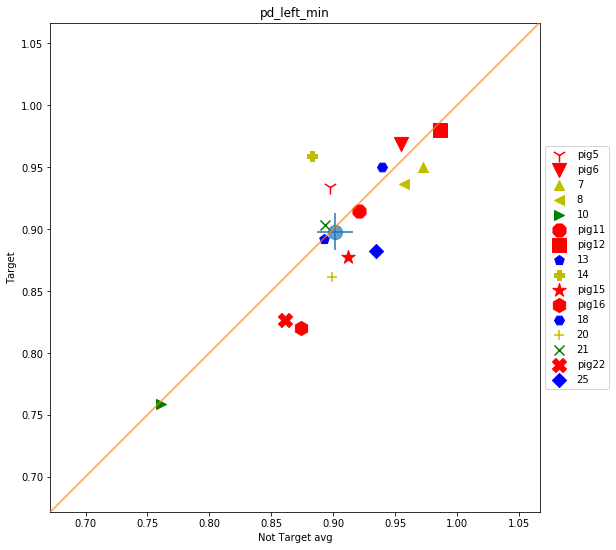

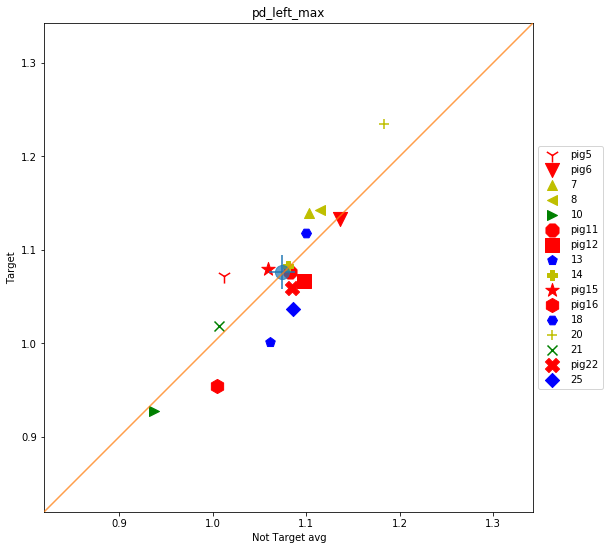

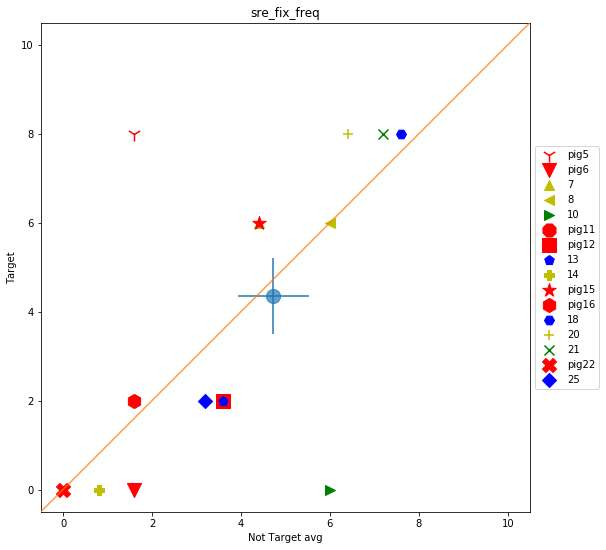

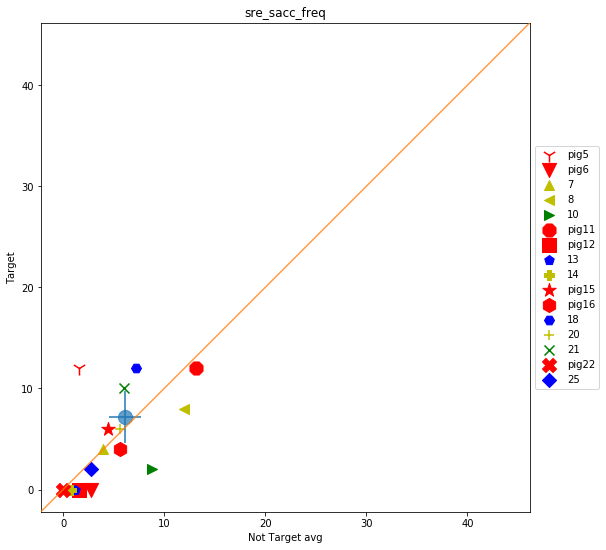

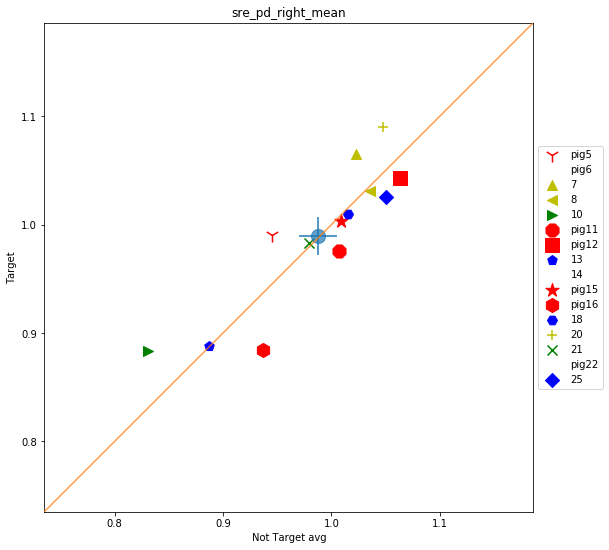

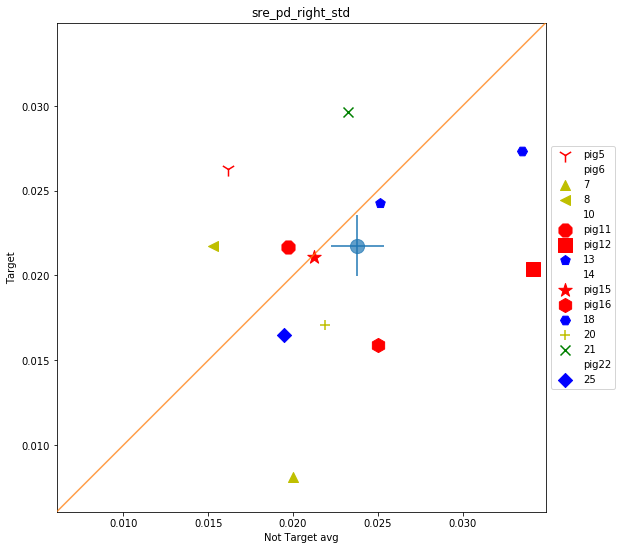

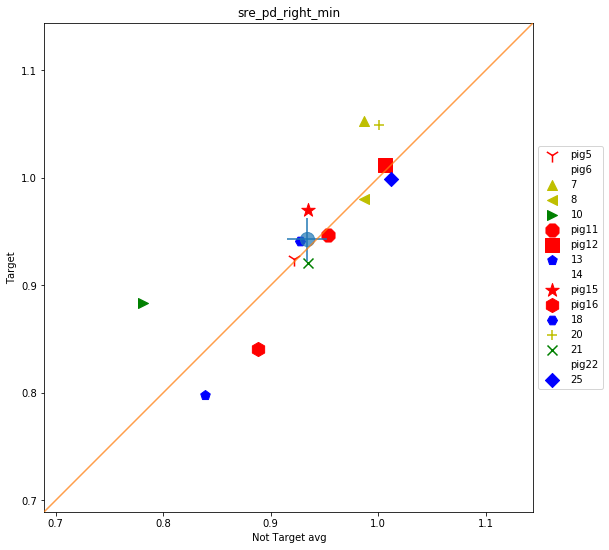

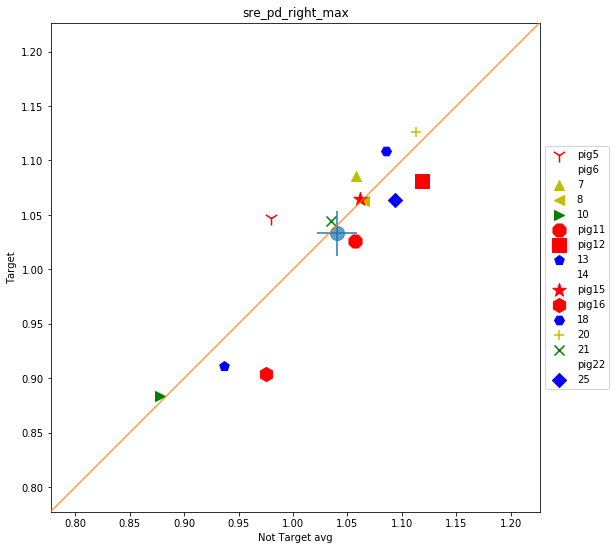

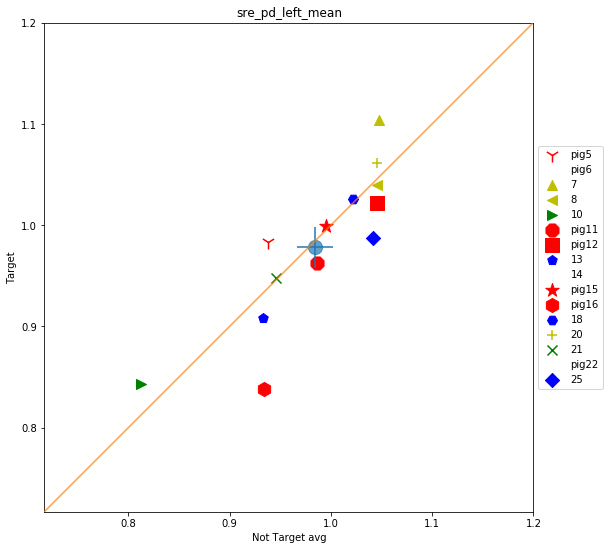

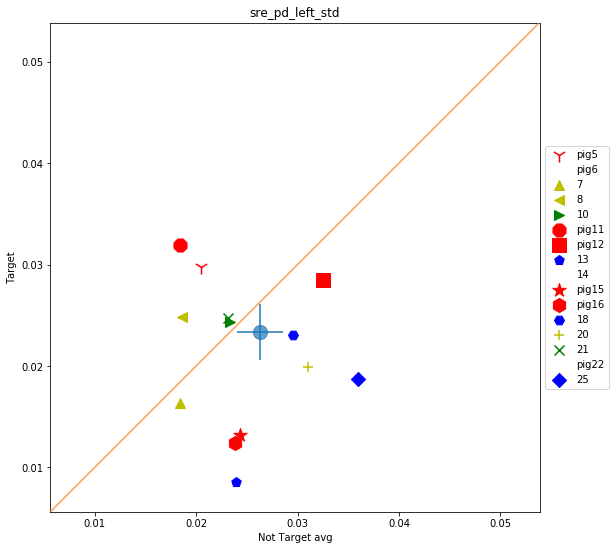

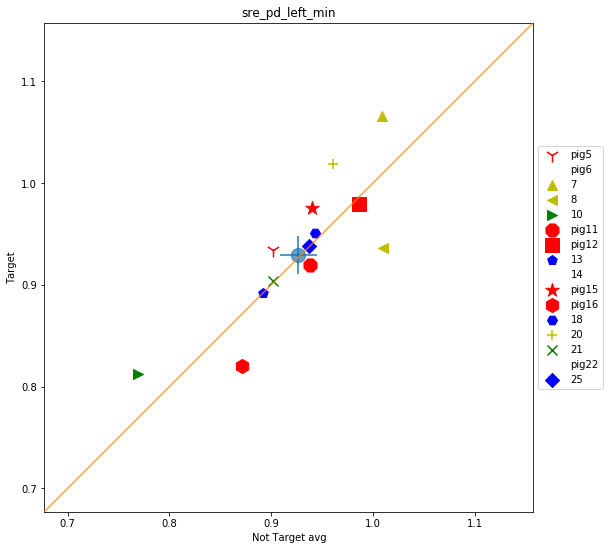

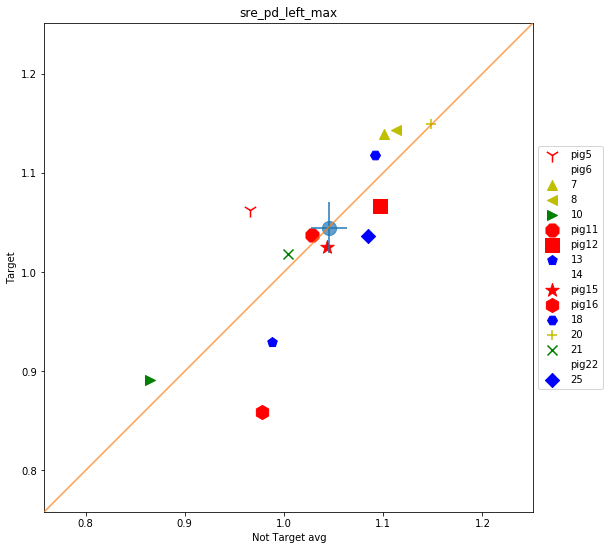

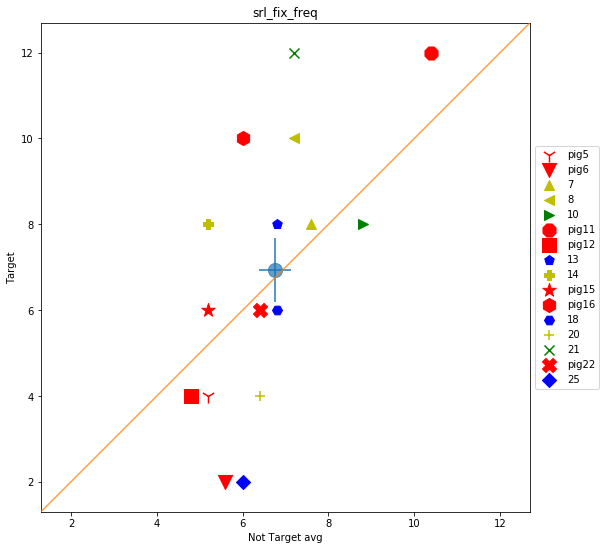

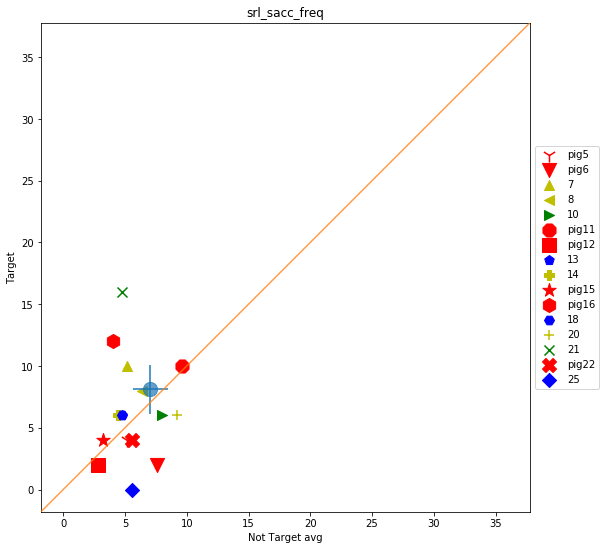

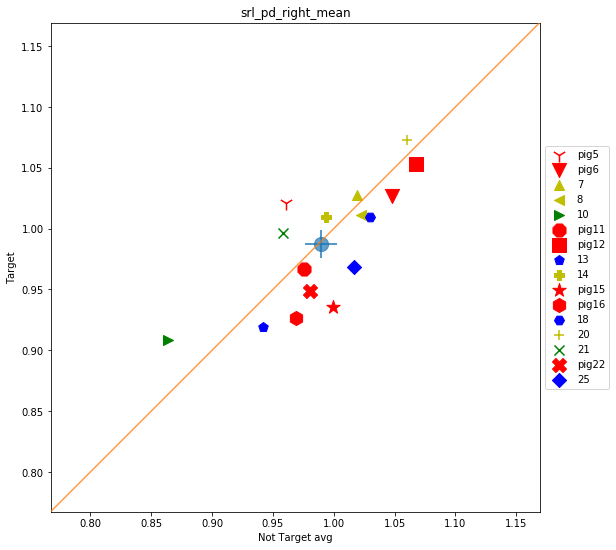

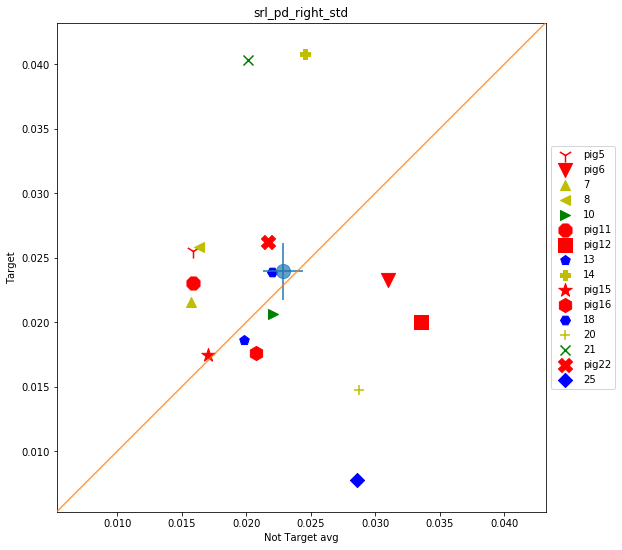

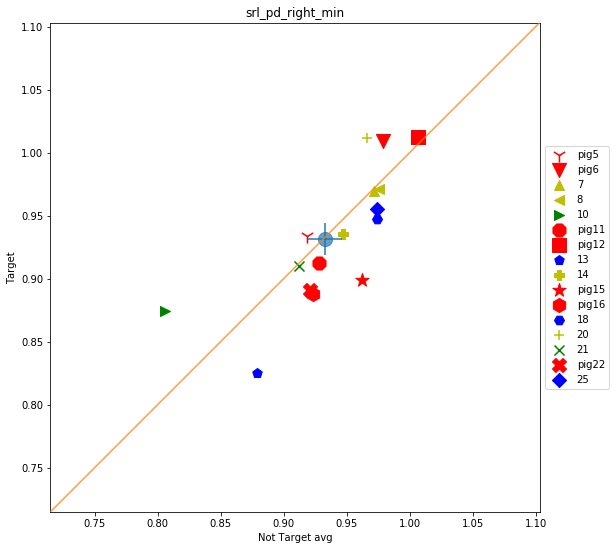

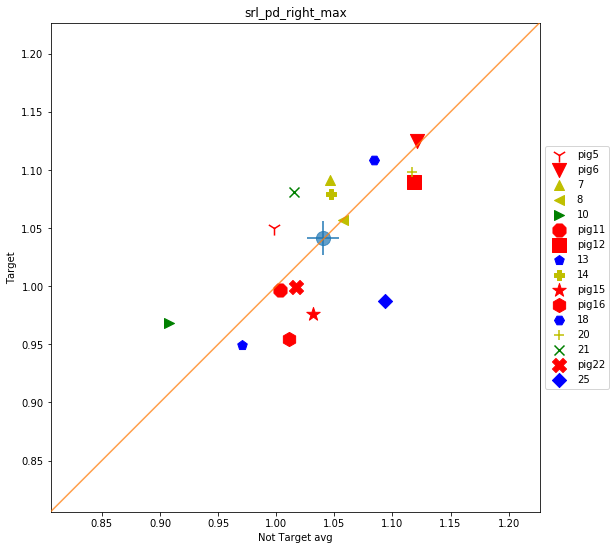

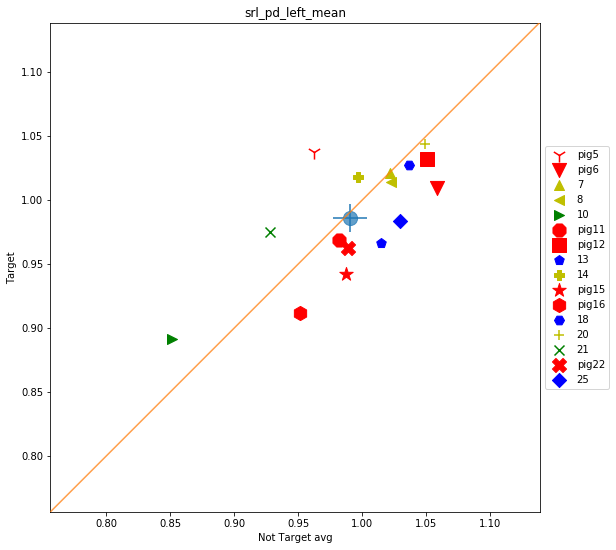

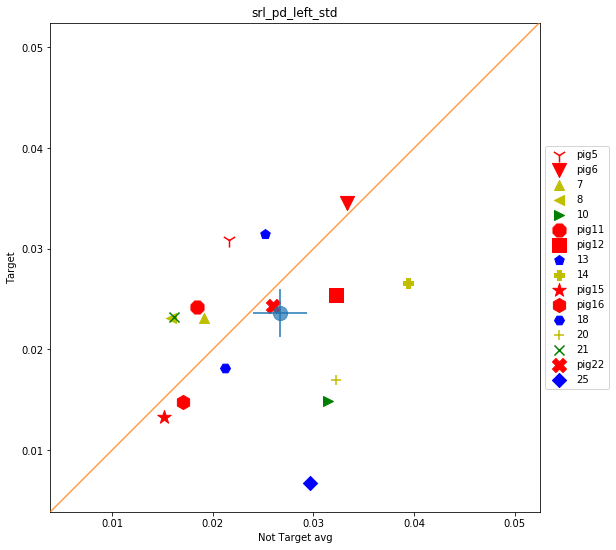

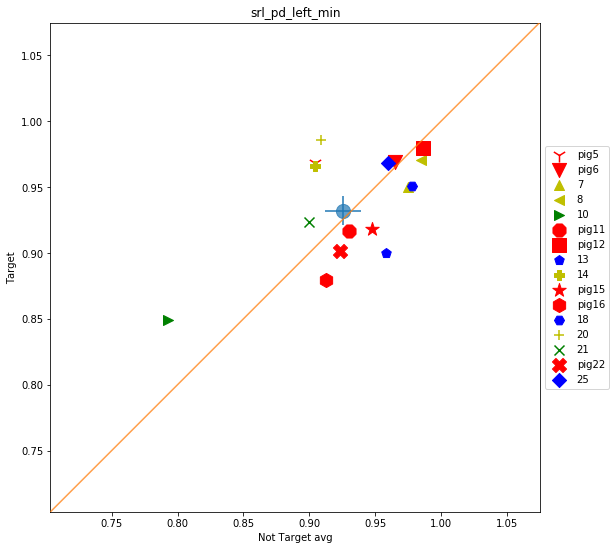

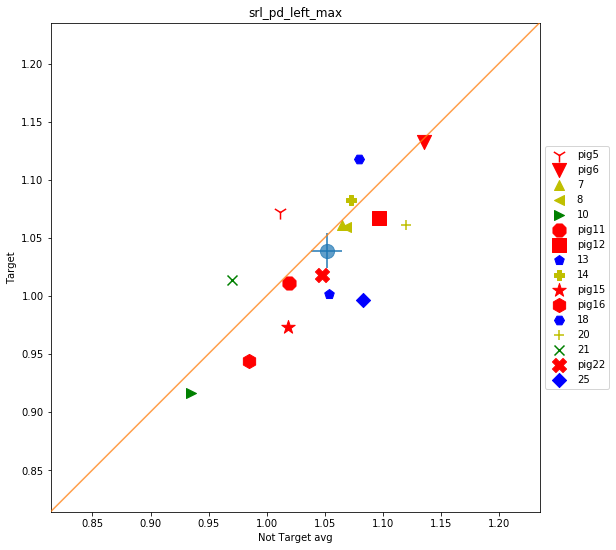

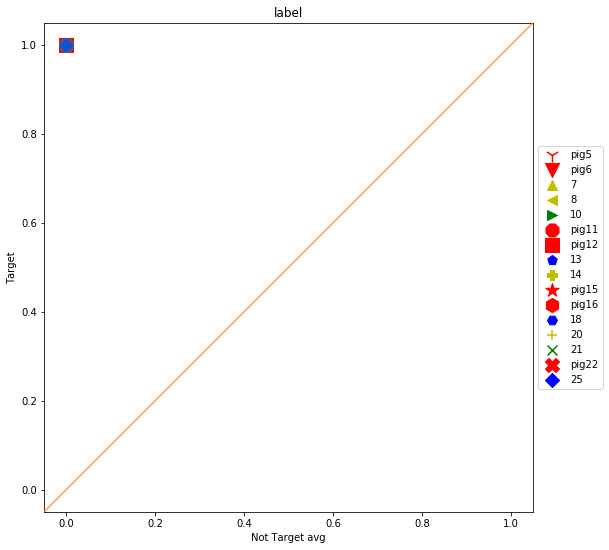

In [16]:

for f in feat_cols:
    fig, axs = plt.subplots(1, figsize=(9, 9))
    labels = []
    
    pallX = aggrZeros[f].mean()
    pallX_ste = aggrZeros[f].sem()
    
    pallY = aggrOnes[f].mean()
    pallY_ste = aggrOnes[f].sem()
    
  
    for i, sub in enumerate(subjects):
        
        if(sub == 4):
            continue
        
        axs.set_title("{}".format(f))
        axs.set_xlabel("Not Target avg")
        axs.set_ylabel("Target")
        axs.set_label("{}".format(sub))

        if(aggrOnes.loc[aggrOnes['subject'] == sub]["card_class"].values[0] == "pig"):
            size=200
            color = "r"
            labels.append("pig{}".format(sub))
        elif(aggrOnes.loc[aggrOnes['subject'] == sub]["card_class"].values[0] == "unicorn"):
            size=100
            color = "b"
            labels.append("{}".format(sub))
        elif(aggrOnes.loc[aggrOnes['subject'] == sub]["card_class"].values[0] == "pepper"):
            size=100
            color = "k"
            labels.append("{}".format(sub))
        elif(aggrOnes.loc[aggrOnes['subject'] == sub]["card_class"].values[0] == "minion"):
            size=100
            color = "g"
            labels.append("{}".format(sub))
        elif(aggrOnes.loc[aggrOnes['subject'] == sub]["card_class"].values[0] == "hedge"):
            size=100
            color = "c"
            labels.append("{}".format(sub))
        elif(aggrOnes.loc[aggrOnes['subject'] == sub]["card_class"].values[0] == "aliens"):
            size=100
            color = "y"
            labels.append("{}".format(sub))
        
        axs.scatter(aggrZeros.loc[aggrZeros['subject'] == sub][f],
                    aggrOnes.loc[aggrOnes['subject'] == sub][f],
                    s=size,
                    c=color,
                    marker=markers[i]) 
    
    
    minX = aggrZeros[f].min()
    maxX = aggrZeros[f].max()        
    minY = aggrOnes[f].min()
    maxY = aggrOnes[f].max()       
    minXY = min(minX, minY)
    maxXY = max(maxY, maxY)        

    mn = (maxXY + minXY) / 20
    
    minXY = minXY - mn
    maxXY = maxXY + mn
        
    lims = [minXY, maxXY]
        
    axs.set_xlim(minXY, maxXY)
    axs.set_ylim(minXY, maxXY)
    axs.set_aspect('equal')        
    
    plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))    
    
    axs.scatter(pallX, pallY, s=200, alpha=0.7)
    axs.errorbar(pallX, pallY,
            xerr=pallX_ste,
            yerr=pallY_ste)
    
    axs.plot(lims, lims, alpha=0.75, zorder=100)
    fig.savefig("plots/{}/subject/nTvsT_{}".format(mode, f))


plt.show()
#axs[c].scatter(zeros["subject"], zeros[col], s=60, c="b", marker=".")


In [17]:
# Aggregate by card

def aggregateByCard(card, aggrZeros, aggrOnes):
    data = features[plot_column_names].loc[features['card_class'] == card]
    
    zeros = data.loc[features['label'] == 0].drop(['card_class'], axis=1)
    ones = data.loc[features['label'] == 1].drop(['card_class'], axis=1)

    w = len(ones.index)
    
    for col in zeros.columns:
        zeros[col] = zeros[col].mean()
        ones[col] = ones[col].mean()
        
    zeros = zeros.head(1)
    zeros['card_class'] = card
    
    ones = ones.head(1)
    ones['card_class'] = card

    aggrZeros = aggrZeros.append(zeros, ignore_index=True)
    aggrOnes = aggrOnes.append(ones, ignore_index=True)
    
    return aggrZeros, aggrOnes, w
    

cZ = pd.DataFrame(columns=plot_column_names)
cO = pd.DataFrame(columns=plot_column_names)
weights = []

for card in card_names:
    cZ, cO, w= aggregateByCard(card, cZ, cO)
    weights.append(w)

card_weights = dict(zip(card_names, weights))

cO

,card_class,duration,fix_freq,label,pd_left_max,pd_left_mean,pd_left_min,pd_left_std,pd_right_max,pd_right_mean,...,srl_pd_left_max,srl_pd_left_mean,srl_pd_left_min,srl_pd_left_std,srl_pd_right_max,srl_pd_right_mean,srl_pd_right_min,srl_pd_right_std,srl_sacc_freq,subject
0,unicorn,3033.250000,1.517695,1.0,1.076520,0.981135,0.893785,0.031662,1.052342,0.973434,...,1.061077,0.982495,0.917307,0.026487,1.033184,0.970357,0.905898,0.022500,12.000000,15.000000
1,minion,5239.000000,2.468561,1.0,0.973166,0.914687,0.831037,0.030207,1.025077,0.926452,...,0.965113,0.932908,0.886414,0.019059,1.025077,0.952230,0.892009,0.030478,11.000000,15.500000
2,pig,4585.142857,1.470191,1.0,1.063094,0.986562,0.902931,0.031911,1.065467,0.992237,...,1.030994,0.980499,0.933230,0.023908,1.027489,0.982668,0.935017,0.021872,5.428571,12.428571
3,aliens,4234.000000,1.838737,1.0,1.149842,1.037677,0.926696,0.036881,1.111480,1.038463,...,1.065919,1.024260,0.968026,0.022481,1.081384,1.030188,0.971827,0.025739,7.500000,12.250000


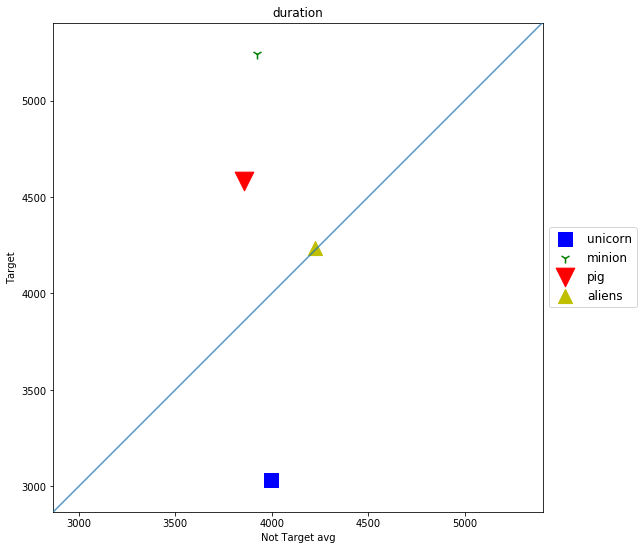

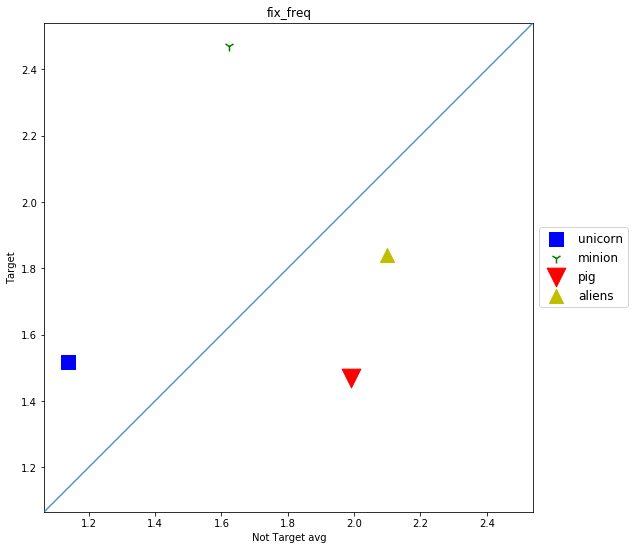

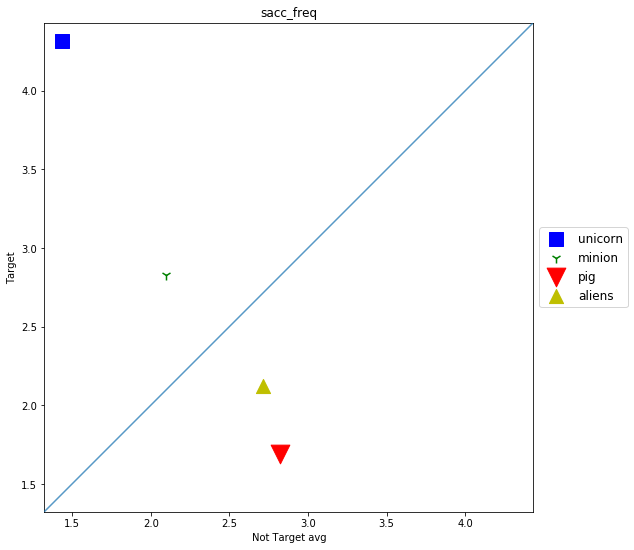

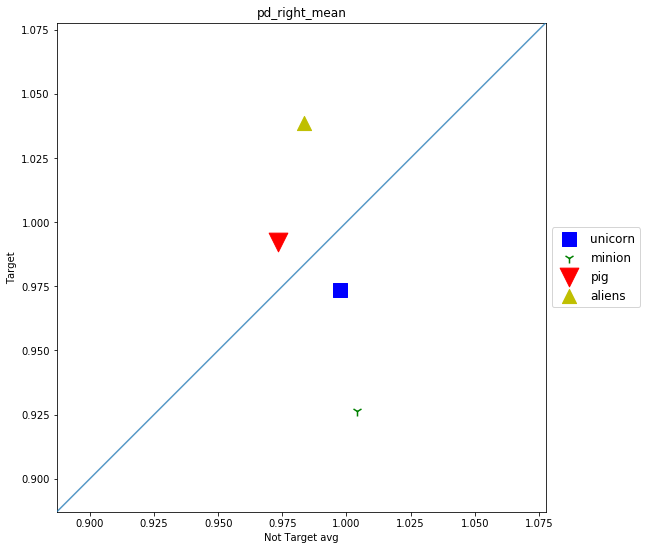

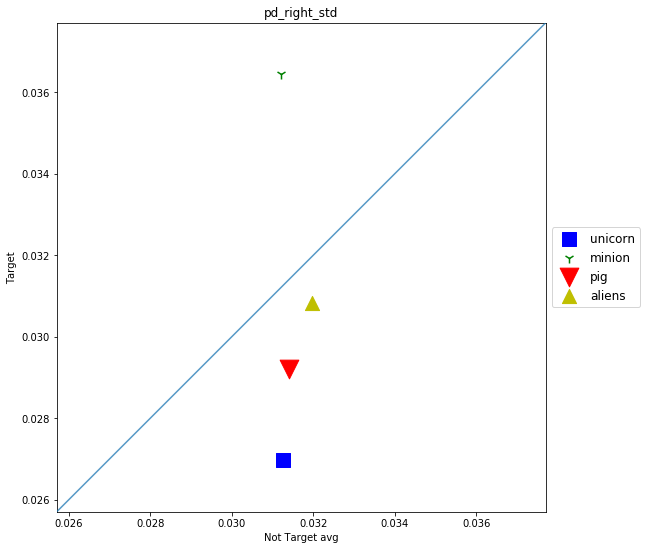

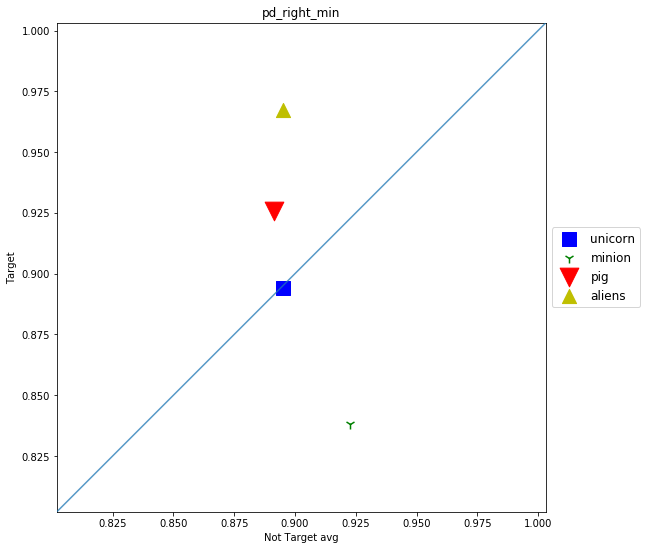

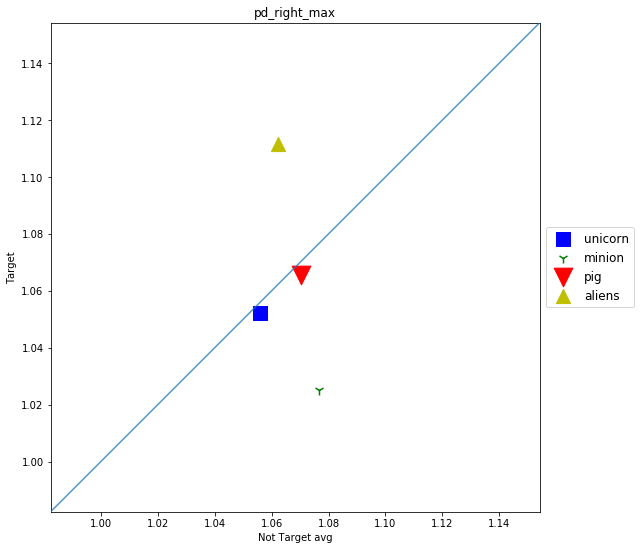

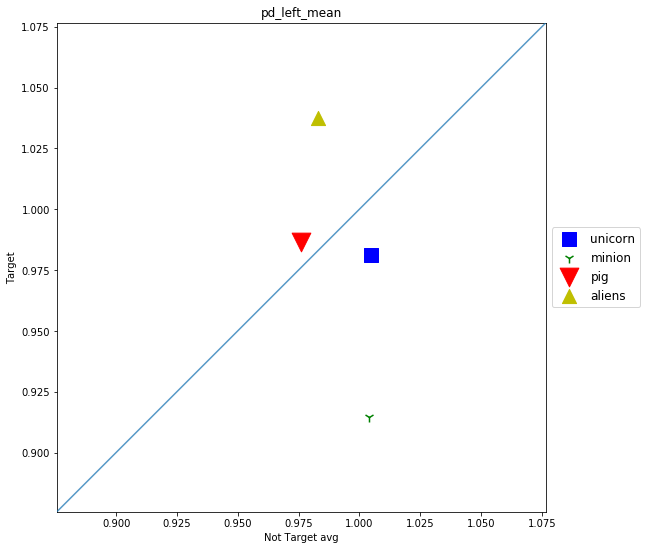

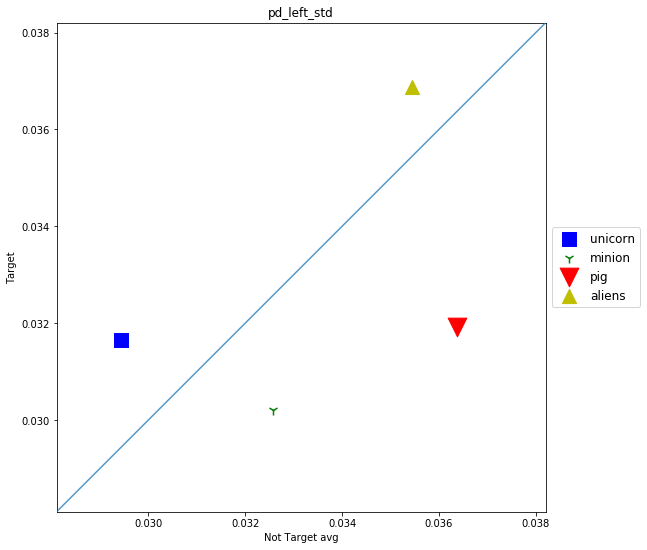

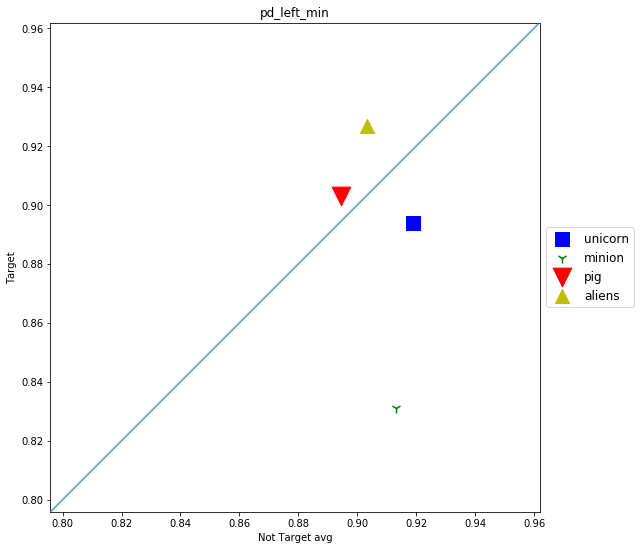

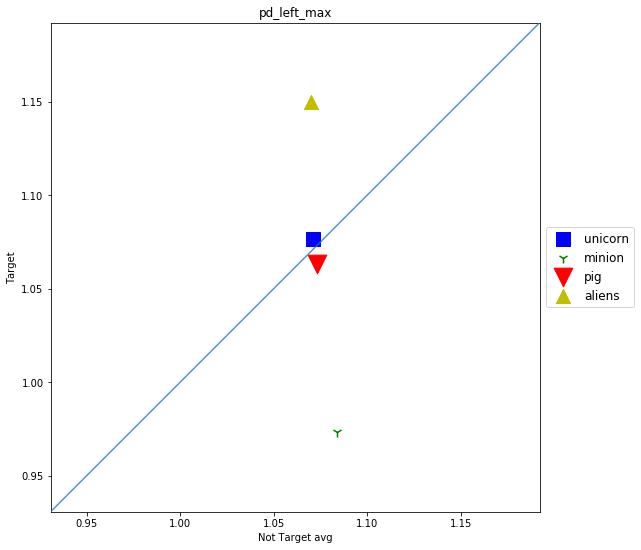

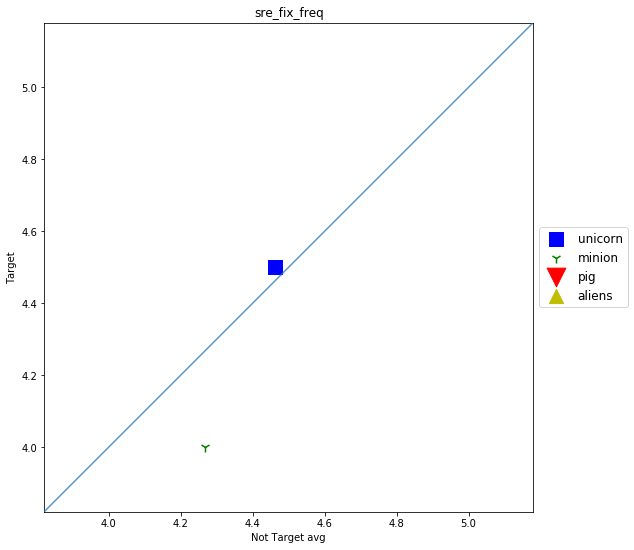

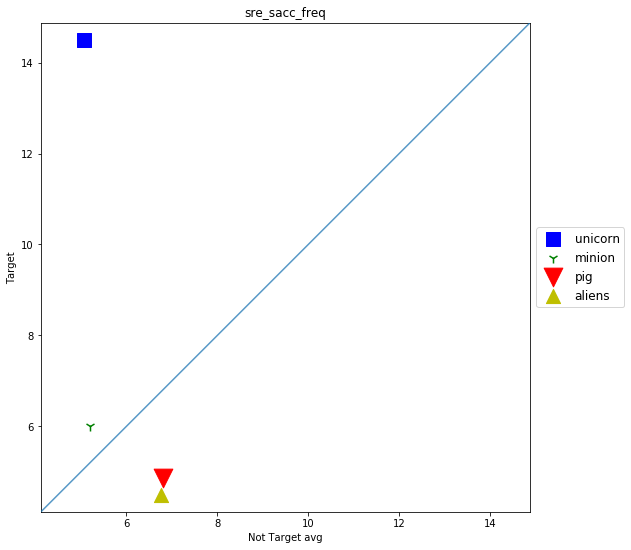

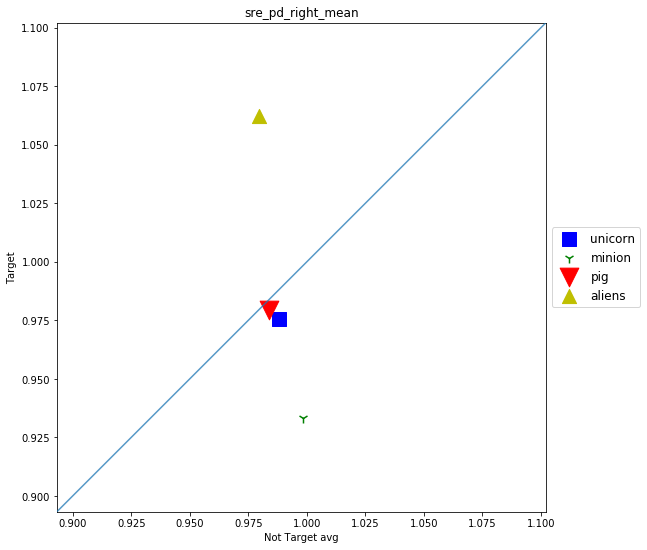

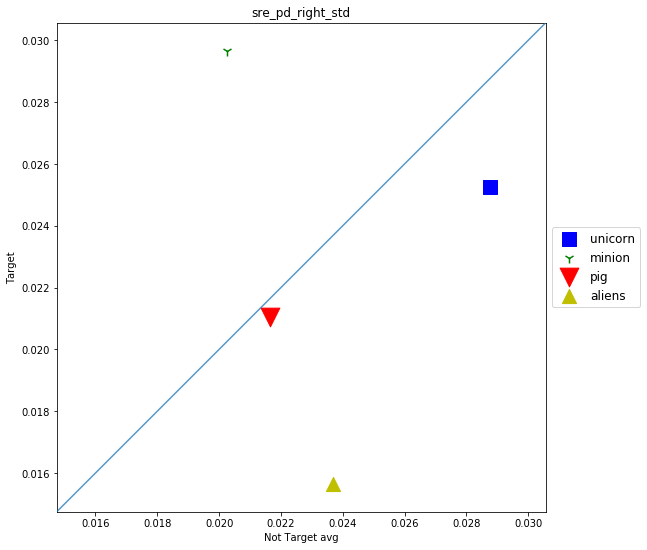

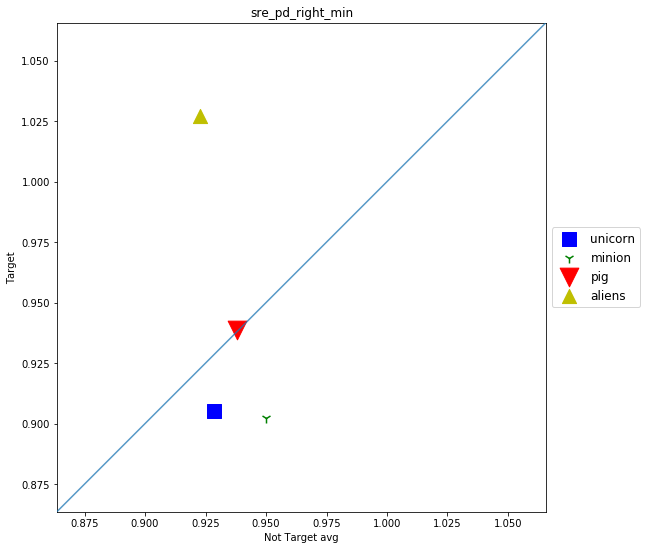

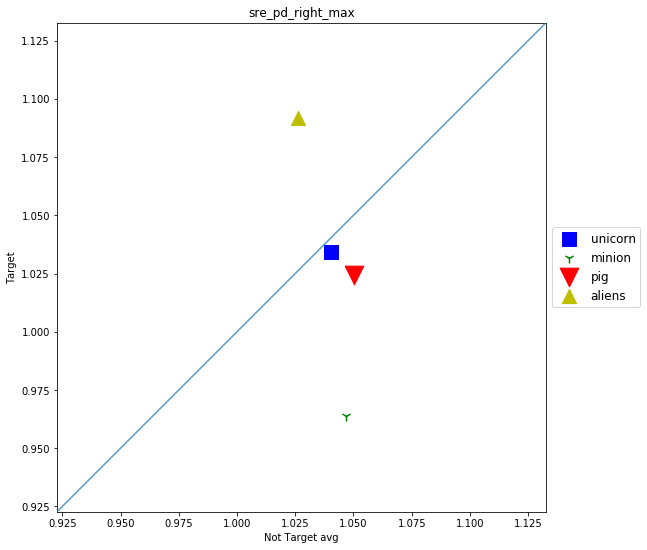

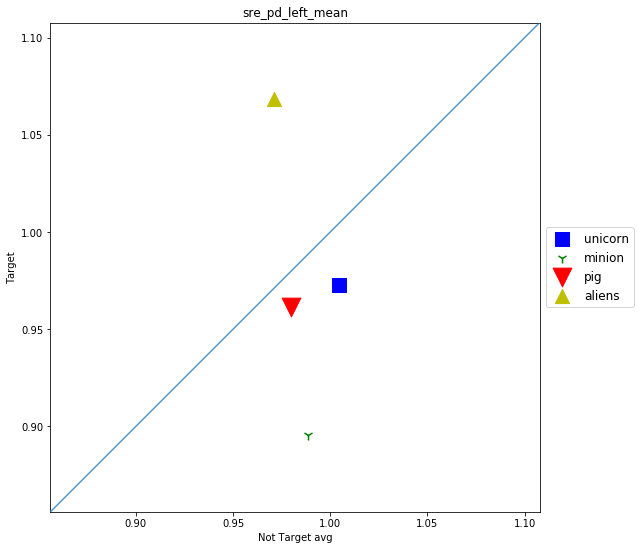

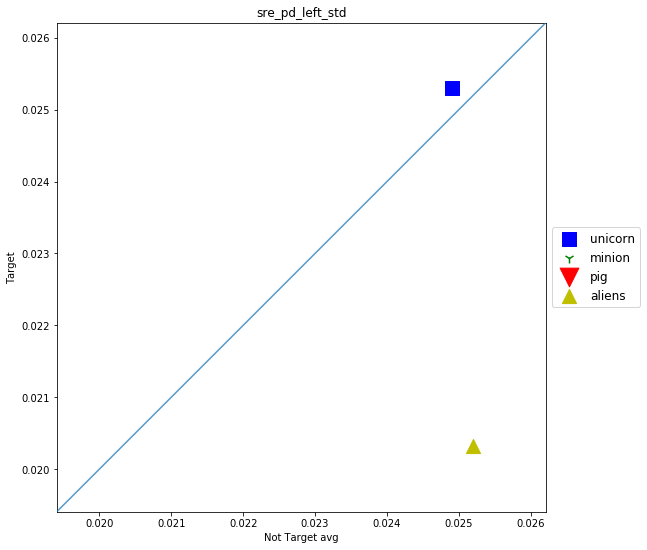

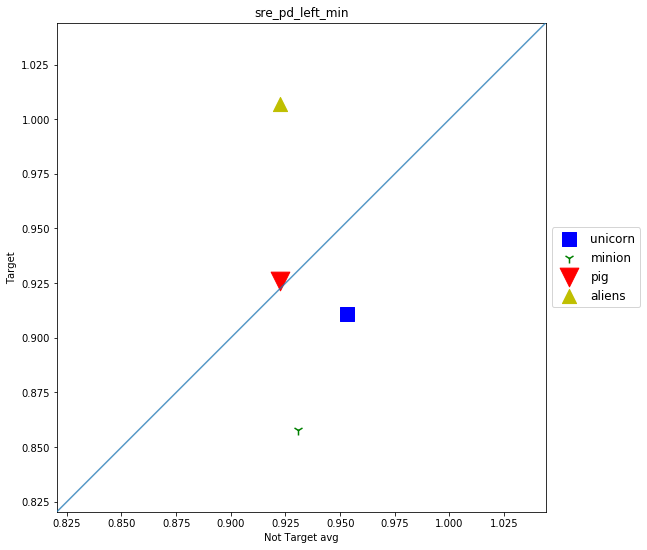

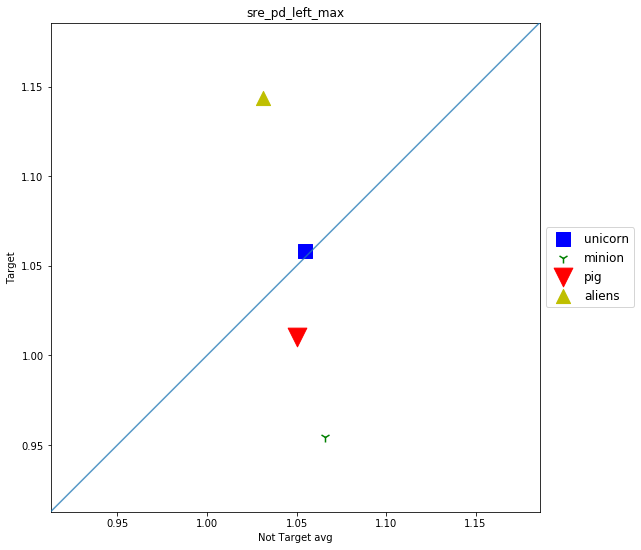

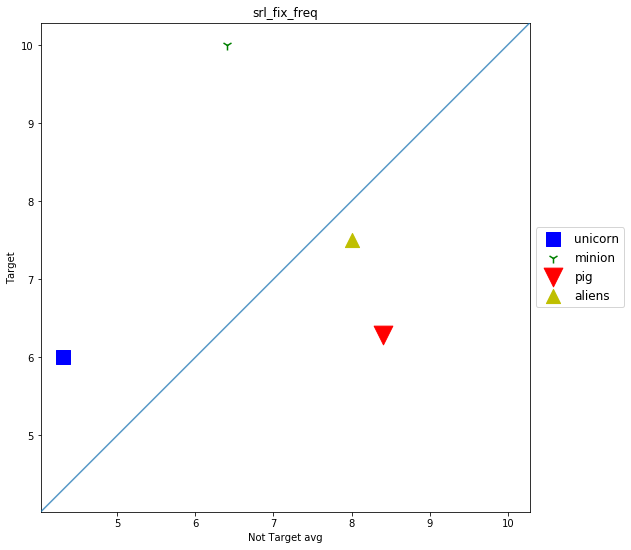

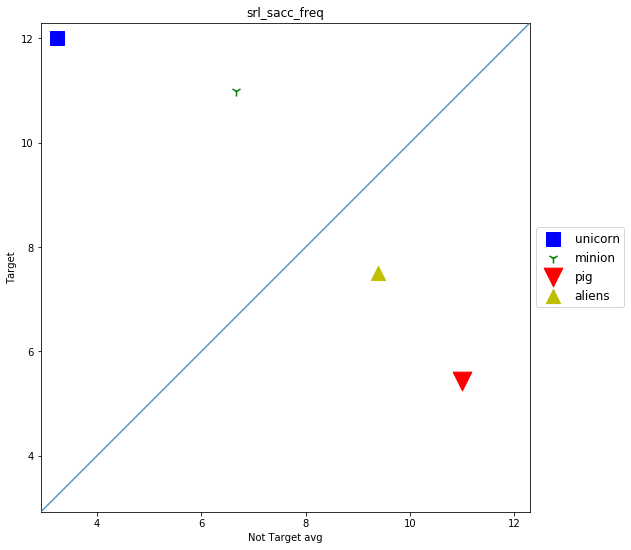

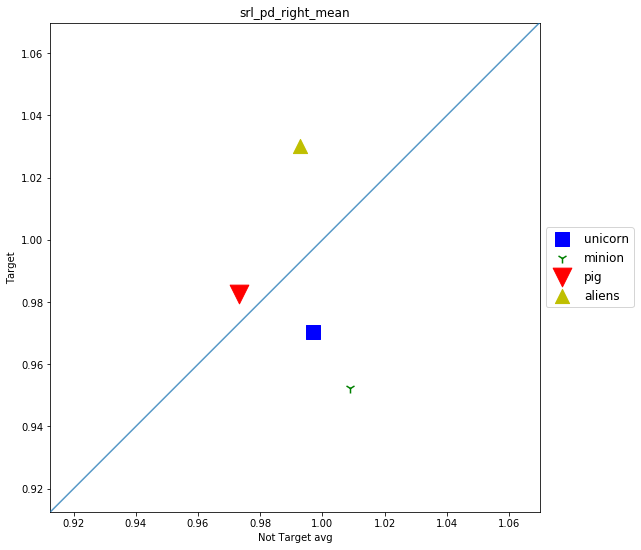

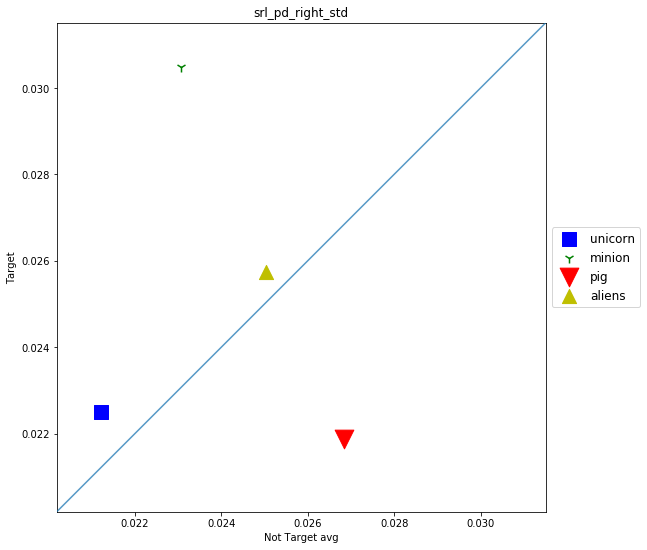

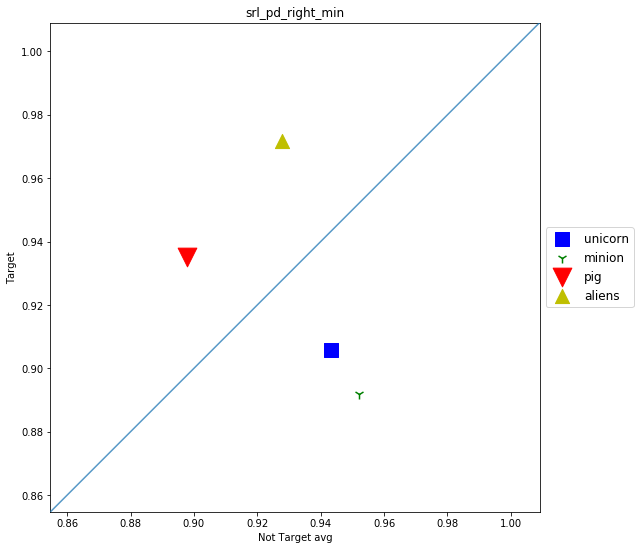

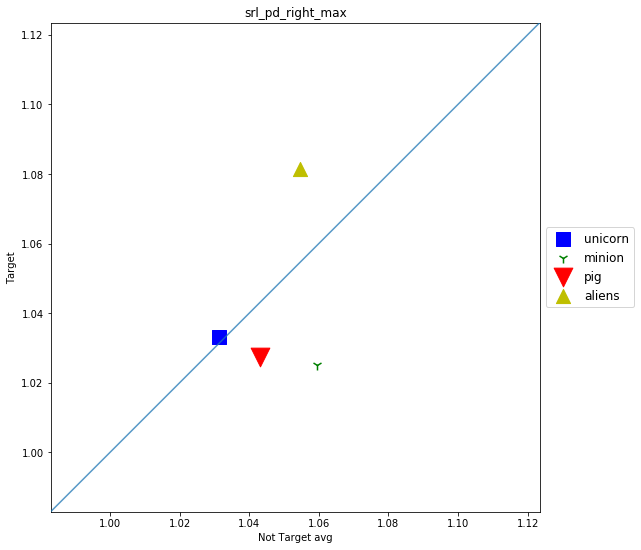

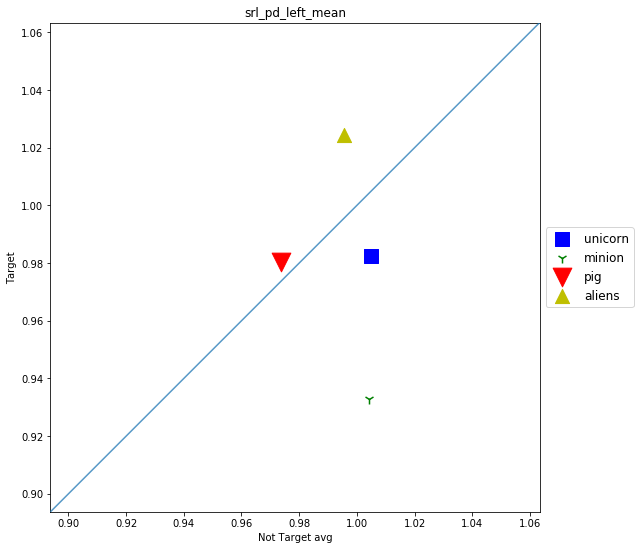

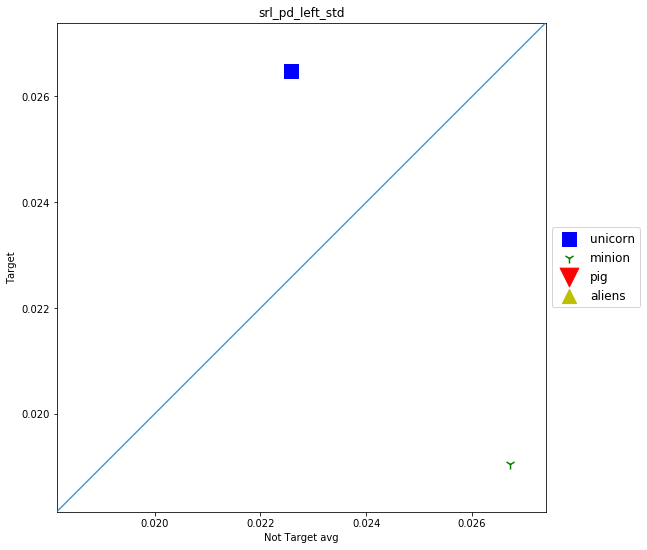

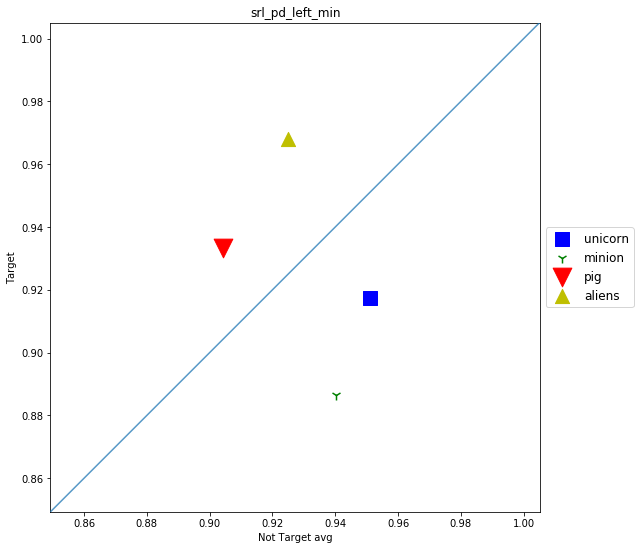

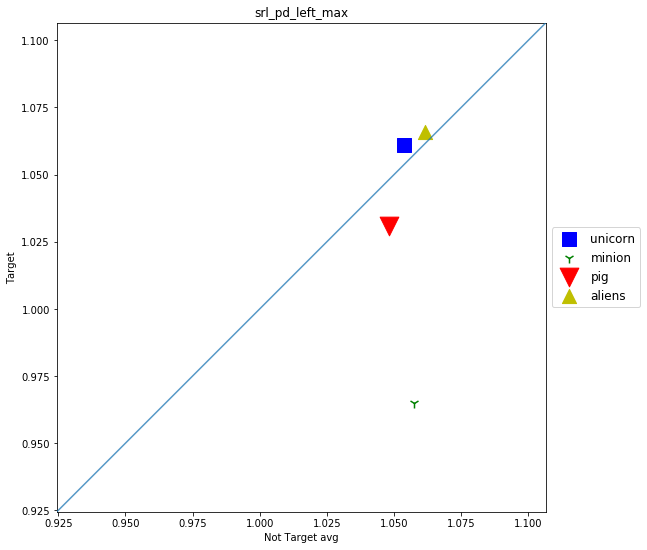

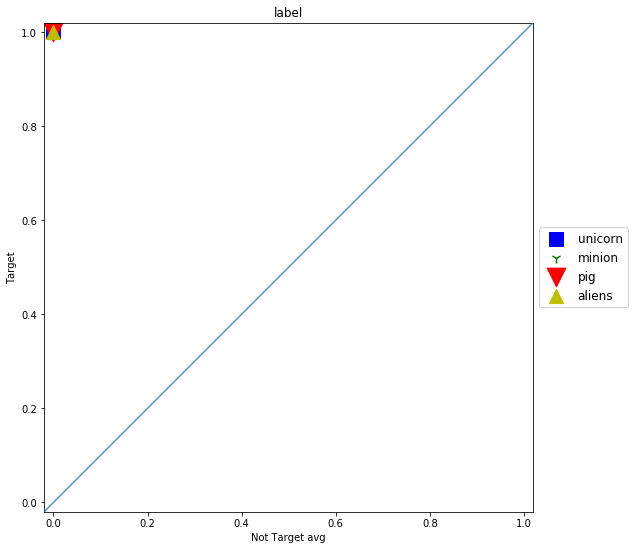

In [18]:
for f in feat_cols:
    fig2, axs2 = plt.subplots(1, figsize=(9, 9))
    labels = []
    
    for c, card in enumerate(card_names):
        
        if(card == "pig"):
            color = "r"
        elif(card == "unicorn"):
            color = "b"
        elif(card == "minion"):
            color = "g"
        elif(card == "aliens"):
            color = "y"
        #elif(card == "pepper"):
        #    color = "k"
        #elif(card == "hedge"):
        #    color = "c"
        
        axs2.set_title("{}".format(f))
        axs2.set_xlabel("Not Target avg")
        axs2.set_ylabel("Target")
        axs2.set_label("{}".format(sub))
        
        size = card_weights[card] * 50            
        axs2.scatter(cZ.loc[cZ['card_class'] == card][f],
                    cO.loc[cO['card_class'] == card][f],
                    s=size,
                    c=color,
                    marker=markers[c])    
    
    minX = cZ[f].min()
    maxX = cZ[f].max()        
    minY = cO[f].min()
    maxY = cO[f].max()       
    minXY = min(minX, minY)
    maxXY = max(maxY, maxY)        

    mn = (maxXY + minXY) / 50
    
    minXY = minXY - mn
    maxXY = maxXY + mn
        
    lims = [minXY, maxXY]
        
    axs2.set_xlim(minXY, maxXY)
    axs2.set_ylim(minXY, maxXY)
    axs2.set_aspect('equal')
    
    plt.legend(card_names, loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')
    
    axs2.plot(lims, lims, alpha=0.75, zorder=100)
    fig2.savefig("plots/{}/card/nTvsT_{}".format(mode, f))
    
plt.show()

In [19]:
aggrZeros

,card_class,duration,fix_freq,label,pd_left_max,pd_left_mean,pd_left_min,pd_left_std,pd_right_max,pd_right_mean,...,srl_pd_left_max,srl_pd_left_mean,srl_pd_left_min,srl_pd_left_std,srl_pd_right_max,srl_pd_right_mean,srl_pd_right_min,srl_pd_right_std,srl_sacc_freq,subject
0,avg,2490.8,3.338911,0.0,1.115158,0.898570,0.783837,0.058207,1.050255,0.907126,...,1.114286,0.907665,0.808250,0.059448,1.050255,0.912584,0.818560,0.034747,28.8,4.0
1,avg,2688.6,1.047750,0.0,1.011773,0.962370,0.897682,0.022056,0.998411,0.960424,...,1.011773,0.962534,0.903951,0.021634,0.998411,0.960715,0.918832,0.015893,5.2,5.0
2,avg,3094.6,1.094833,0.0,1.135616,1.052853,0.954364,0.037034,1.172326,1.041742,...,1.135616,1.057891,0.964821,0.033306,1.121211,1.047834,0.979151,0.031006,7.6,6.0
3,avg,3870.2,1.535912,0.0,1.102632,1.034544,0.972632,0.024220,1.062700,1.022208,...,1.065263,1.021854,0.974737,0.019129,1.046632,1.019085,0.971833,0.015758,5.2,7.0
4,avg,3538.6,1.728664,0.0,1.114940,1.034935,0.957247,0.023463,1.076724,1.032990,...,1.068741,1.022341,0.984350,0.015886,1.057834,1.022573,0.975781,0.016367,6.4,8.0
5,avg,5310.2,2.384656,0.0,0.937243,0.834460,0.760930,0.032229,0.907983,0.843910,...,0.934459,0.851006,0.792481,0.031451,0.907522,0.864075,0.805817,0.022055,8.0,10.0
6,avg,5819.6,2.810779,0.0,1.082213,0.999903,0.920631,0.032670,1.089830,1.004423,...,1.019322,0.981388,0.929823,0.018407,1.003397,0.975577,0.928070,0.015856,9.6,11.0
7,avg,1564.0,1.530789,0.0,1.097187,1.049305,0.986330,0.032477,1.118312,1.066081,...,1.097187,1.050246,0.986330,0.032216,1.118312,1.067195,1.006362,0.033507,2.8,12.0
8,avg,3223.8,1.389552,0.0,1.061530,0.995823,0.892154,0.042958,0.980923,0.931050,...,1.053540,1.014903,0.958200,0.025162,0.970835,0.942011,0.878855,0.019839,4.8,13.0
9,avg,5120.4,0.992360,0.0,1.080599,0.985835,0.882730,0.039863,1.051568,0.982833,...,1.072685,0.996294,0.904612,0.039365,1.046773,0.993671,0.947035,0.024570,4.4,14.0
